# Practical 3: Artificial Neural Network

This is the first task of Practical 3. You will build a neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 
You will build the classifier from scartch. 

We will mark your code based on the accuracy of your model. You should get **at least 97%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [2]:
# !pip install keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau

In [2]:
tf.__version__

'2.4.0'

In [3]:
tf.keras.__version__

'2.4.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

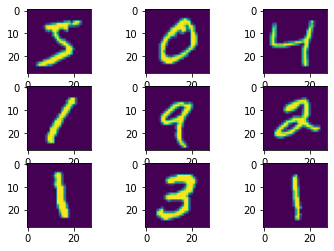

(60000, 28, 28)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
    
plt.show()

X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

print(X_train_full.shape)

# Add a channels dimension
X_train_full = X_train_full[..., tf.newaxis].astype("float32")
X_test = X_test[..., tf.newaxis].astype("float32")
y_train_full

## Build and train the model

Build and train your model. 

In [29]:
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# TODO: Build your model


model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(256, activation="elu", kernel_initializer="he_normal"),
        layers.BatchNormalization(),
        layers.Dropout(rate=0.2),
        layers.Dense(128, activation="elu", kernel_initializer="he_normal"),
        layers.BatchNormalization(),
        layers.Dropout(rate=0.2),
        layers.Dense(128, activation="elu", kernel_initializer="he_normal"),
        layers.BatchNormalization(),
        layers.Dropout(rate=0.2),
        layers.BatchNormalization(),
        layers.Dense(10, activation="softmax"),
    ]
)



In [30]:
# show the structure of your model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512       
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)              

In [31]:
batch_size = 128
epochs = 30

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=2,verbose=1)

opt = keras.optimizers.Adam(learning_rate=0.0015)

model.compile(loss="SparseCategoricalCrossentropy", optimizer=opt, metrics=["accuracy"])

history=model.fit(X_train_full, y_train_full, batch_size=batch_size, epochs=epochs,callbacks=[reduce_lr,
                                                                                              early_stopping_cb],validation_split=0.15)



Epoch 1/30
399/399 [==============================] - 3s 5ms/step - loss: 0.5298 - accuracy: 0.8341 - val_loss: 0.1327 - val_accuracy: 0.9606
Epoch 2/30
399/399 [==============================] - 2s 4ms/step - loss: 0.1851 - accuracy: 0.9428 - val_loss: 0.0980 - val_accuracy: 0.9709
Epoch 3/30
399/399 [==============================] - 2s 4ms/step - loss: 0.1337 - accuracy: 0.9570 - val_loss: 0.0845 - val_accuracy: 0.9741
Epoch 4/30
399/399 [==============================] - 2s 4ms/step - loss: 0.1092 - accuracy: 0.9663 - val_loss: 0.0747 - val_accuracy: 0.9788
Epoch 5/30
399/399 [==============================] - 2s 4ms/step - loss: 0.0880 - accuracy: 0.9723 - val_loss: 0.0746 - val_accuracy: 0.9780
Epoch 6/30
399/399 [==============================] - 2s 4ms/step - loss: 0.0786 - accuracy: 0.9751 - val_loss: 0.0705 - val_accuracy: 0.9786

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00030000000260770325.
Epoch 7/30
399/399 [==============================] - 2s 4ms/step 

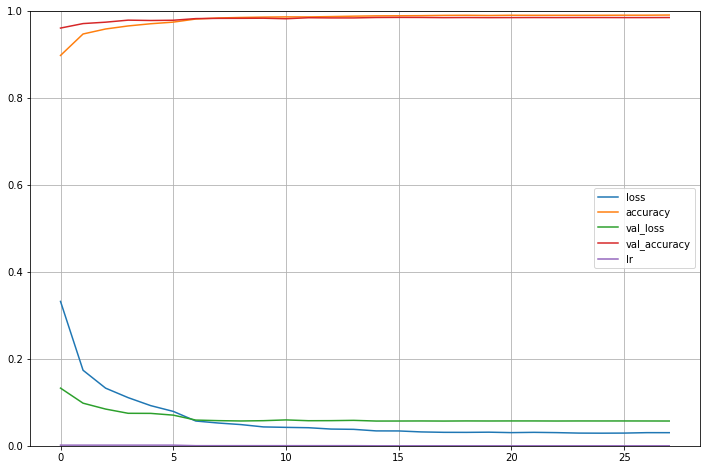

In [32]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

In [33]:
# Save the weights
model.save("mnist.h5")

## Load the model and evaluate it on the test data

In [34]:
model = keras.models.load_model("mnist.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 796us/step - loss: 0.0551 - accuracy: 0.9850


[0.055093541741371155, 0.9850000143051147]

## Short report

Please write briefly how you build and train the model. Please include the decisions you made, such as why you use x number layers, and the difficulties you met.

### Model Architecture

#### Number of neuron

In general, number of hidden neurons in any layer should be between the size of the input layer (784) and the size of the output layer (10).

It has been empirically shown that model with more depth works better than model with more neurons.We took number of hidden layers as 3. However model tends to overfit if we take more than 3 hidden layers. 

Earlier, we started 3 layers with (512,256,256) hidden layer widths. But it started to over-fit and number of parameters to be trained were huge which also slowed the network.

With same concept in mind,we tested the model with fewer neurons in each layer. Our final architecture for the model was : ***(first_HL=256,second_HL=128,second_HL=128,output=10)*** (HL=hidden layer).

This resulted in better valdation accuracy, faster training of the network and less overfitting.


#### Number of hidden layers
Following the lecture made by the TA, it has been decided to start with two hidden layers and than progressively increasing the number until overfitting. This strategy rely on the well known qualities of Deep Neurons Networks (high parameter efficiency and hierarchical structurization of the features)

#### Activation function and weight initializer

All nodes have an activation functions. To avoid saturation and vanishing gradients, the best ReLU variant for the activation function is the Exponential linear unit (ELU) activation function has been chosen. It slowly smoothes for negative input compared to Relu which changes sharply. The He initializer has been chosen over the Glorot because it is more suited for Relu functions.It brings the variance of those outputs to approximately one.

#### Loss function 
Since we are predicting multiple categories (Categories =10), we used cross-entropy loss function to optimize the network

#### Optimizer
Combining the ideas of momentum optimisation (acceleration) and adaptive learning rates, the Adam optimizer has been preferred. First, the step size was set to 0.001 then it was slowly decreased to improve the accuracy of the model using the ReduceOnPlateau function (patience = 2, factor of 0.2 over the validation accuracy).

#### Learning rate scheduler
When we reach near local optima , it is possible that we donot reach the exact point due to large learning rate. Therefore we used a learning rate scheduler which decreases the learning rate when there is no increment in validation accuracy (called ReduceOnPlateau(patience = 2, factor of 0.2 over the validation accuracy)). This resulted in smaller learning rate near the local optima and it helped us to gain better accuracy .

#### Regularization with Dropout 

To reduce the overfitting in the network, Dropout was used as regularizer after each hidden layer.

#### Normalisation
To reduces the vanishing gradients problem and speed up the learning curve, batch normalisation has been systematically placed after the output of every hidden layers.

#### Batches Size and epochs
The numbers of batch size is decided by the computational power of our laptop. Higher Batch size results in better gradients and faster network training. We set the batch size to 128 (by carefully incrementing the batch size by 2).

Number of Epochs were taken as 30 since training beyond that leads to overfitting. However we also used early stopping and with patience =10 (Number of epochs with no improvement after which training will be stopped). So even if we take more number of epochs, the training will stop early if there is no further improvement in validation accuracy. 

#### Selecting the Best model instead of last

In early stopping, we provide restore_best_weights=True and it helps us to select the model for which we got the best validation accuracy. 

#### Result
Following the best practises and our various experiments, we significantly improved the performance and the time to compute the model. The model plateaued at 98.5% test accurancy.